# Early disease intervention and simulation of intervention effects

*WQD7003 Group 8*

*Leader: XIAO WANJUN(23104578)*

*Member1: MENG HUIDAN(23104917)*

*Member2: LIU YILIN(24056475)*

*Member3: SHI YAN(24057850)*

*Member4: SALVIN A/L RAVINDRAN(17167138)*

## Background
**Current heart disease models are mostly used for risk assessment and lack guidance on intervention effects for users.**

## Plan
**User input of a healthy behavior intervention plan (e.g., reduce BMI by 2, or get an extra hour of sleep per day).**

**The model simulates changes in health status and risk after intervention, helping users understand the importance of lifestyle changes.**

## Gathering Data
The dataset, sourced from the Centers for Disease Control and Prevention (CDC), is an integral component of the Behavioral Risk Factor Surveillance System (BRFSS), which annually conducts telephone surveys to gather vital health information from U.S. residents. Established in 1984 with 15 states, the BRFSS has expanded its coverage to encompass all 50 states, the District of Columbia, and three U.S. territories, performing over 400,000 adult interviews each year, thus establishing itself as the world's largest continuously conducted health survey system. The most recent dataset, which includes data from 2023, was selected for this project due to its health factors and questions that directly or indirectly influence heart disease. Furthermore, two versions of the dataset are available: one with missing values (NaNs) and one without, providing comprehensive data for analysis and modeling.

Link: https://www.cdc.gov/heart-disease/risk-factors/?CDC_AAref_Val=https://www.cdc.gov/heartdisease/risk_factors.htm

Kaggle link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data

## Accomplish

### Data Pre-processing
*Author: Salvin & LIU YILIN*

**Data Preprocessing Steps:**

- **Loading the Dataset**
- **Exploring the Raw Data:** looking at basic information about the dataset
- **Checking for Missing Values:** Identify any missing values in the dataset.
- **Handling Missing Value:** Use the median to fill missing values in numerical columns and the mode to fill missing values in categorical columns.、
- **Check and Remove Duplicate Data**
- **Save cleaned dataset in CSV file**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.option_context('display.max_columns', None)

**Load the Dataset**

In [ ]:
data = pd.read_csv('heart_2022_with_nans.csv')
display(data.shape)
display(data.info())

(445132, 40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

None

**Exploring the Raw Data**
##### *Overview of numerical and categorical data*

In [ ]:
# Overview of numerical data
numerical_data_overview = data.describe()
numerical_columns = numerical_data_overview.columns

# Overview of categorical data
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_data_overview = data[categorical_columns].describe()

print("Numerical Data Overview:")
display(numerical_data_overview.T)
print("\n")
print("Categorical Data Overview:")
display(categorical_data_overview.T)

Numerical Data Overview:


,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,434205.0,4.347919,8.688912,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,436065.0,4.382649,8.387475,0.00,0.00,0.00,5.00,30.00
SleepHours,439679.0,7.022983,1.502425,1.00,6.00,7.00,8.00,24.00
HeightInMeters,416480.0,1.702691,0.107177,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,403054.0,83.074470,21.448173,22.68,68.04,80.74,95.25,292.57
BMI,396326.0,28.529842,6.554889,12.02,24.13,27.44,31.75,99.64




Categorical Data Overview:


,count,unique,top,freq
State,445132,54,Washington,26152
Sex,445132,2,Female,235893
GeneralHealth,443934,5,Very good,148444
LastCheckupTime,436824,4,Within past year (anytime less than 12 months ...,350944
PhysicalActivities,444039,2,Yes,337559
RemovedTeeth,433772,4,None of them,233455
HadHeartAttack,442067,2,No,416959
HadAngina,440727,2,No,414176
HadStroke,443575,2,No,424336
HadAsthma,443359,2,No,376665


**Checking for Missing Values**

Generate a summary table for missing values in numerical columns to facilitate the inspection and analysis of data quality.

In [ ]:
# Initialize DataFrame to store missing data information
numerical_summary_df = pd.DataFrame()

# Iterate over the columns to count NaN values and calculate percentage
for column in data[numerical_columns].columns:
    nan_count = data[column].isna().sum()
    total_count = len(data)
    percent_missing = (nan_count / total_count) * 100

    # Create a DataFrame for the current column's missing data information
    column_missing_data = pd.DataFrame({
        'Column': [column],
        'Non-Data (NaN Count)': [nan_count],
        'Percentage Missing': [percent_missing]
    })

    # Concatenate with the main missing_data_df DataFrame
    numerical_summary_df = pd.concat([numerical_summary_df, column_missing_data], ignore_index=True)

# Assuming 10% missing data as threshold
numerical_summary_df['Status'] = np.where(numerical_summary_df['Percentage Missing'] <= 10, 'Pass', 'Fail')

numerical_summary_df.reset_index(drop=True, inplace=True)
numerical_summary_df

,Column,Non-Data (NaN Count),Percentage Missing,Status
0,PhysicalHealthDays,10927,2.454777,Pass
1,MentalHealthDays,9067,2.036924,Pass
2,SleepHours,5453,1.225030,Pass
3,HeightInMeters,28652,6.436742,Pass
4,WeightInKilograms,42078,9.452926,Pass
5,BMI,48806,10.964388,Fail


Generate a summary table for missing values in categorical columns.

In [ ]:
# Initialize DataFrame to store missing data information
categorical_summary_df = pd.DataFrame()

# Iterate over the columns to count NaN values and calculate percentage
for column in data[categorical_columns].columns:
    nan_count = data[column].isna().sum()
    total_count = len(data)
    percent_missing = (nan_count / total_count) * 100

    # Create a DataFrame for the current column's missing data information
    column_missing_data = pd.DataFrame({
        'Column': [column],
        'Non-Data (NaN Count)': [nan_count],
        'Percentage Missing': [percent_missing]
    })

    # Concatenate with the main missing_data_df DataFrame
    categorical_summary_df = pd.concat([categorical_summary_df, column_missing_data], ignore_index=True)

# Assuming 10% missing data as threshold
categorical_summary_df['Status'] = np.where(categorical_summary_df['Percentage Missing'] <= 10, 'Pass', 'Fail')

categorical_summary_df.reset_index(drop=True, inplace=True)
categorical_summary_df

,Column,Non-Data (NaN Count),Percentage Missing,Status
0,State,0,0.000000,Pass
1,Sex,0,0.000000,Pass
2,GeneralHealth,1198,0.269134,Pass
3,LastCheckupTime,8308,1.866413,Pass
4,PhysicalActivities,1093,0.245545,Pass
5,RemovedTeeth,11360,2.552052,Pass
6,HadHeartAttack,3065,0.688560,Pass
7,HadAngina,4405,0.989594,Pass
8,HadStroke,1557,0.349784,Pass
9,HadAsthma,1773,0.398309,Pass


Filter numerical and categorical columns with missing data exceeding a specified threshold (where Status is "Fail") and generate corresponding lists.

In [ ]:
missing_numerical = list(numerical_summary_df[numerical_summary_df['Status']=='Fail']['Column'].values)
missing_categorical = list(categorical_summary_df[categorical_summary_df['Status']=='Fail']['Column'].values)

print(missing_numerical)
print(missing_categorical)

['BMI']
['ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


Visualize the distribution of missing values in categorical columns by creating a bar chart for categorical columns where the missing value percentage exceeds the threshold.

,Column,Skewness
0,BMI,1.387739


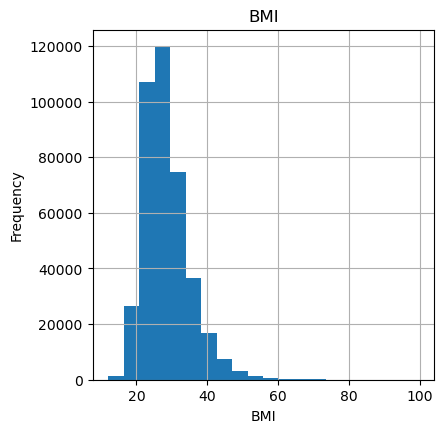

In [ ]:
# Calculating skewness & Plotting histograms for numerical columns
# moderate skewness
skewness_values = data[missing_numerical].skew().reset_index()
skewness_values.columns = ['Column', 'Skewness']
skewness_values = skewness_values.sort_values(by='Skewness', ascending=True)

# Display the DataFrame with skewness values
display(skewness_values)

plt.figure(figsize=(15, 10))
for i, col in enumerate(missing_numerical):
    plt.subplot(2, 3, i + 1)
    data[col].hist(bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

Visualize the category distribution of categorical columns with excessive missing values using bar charts.

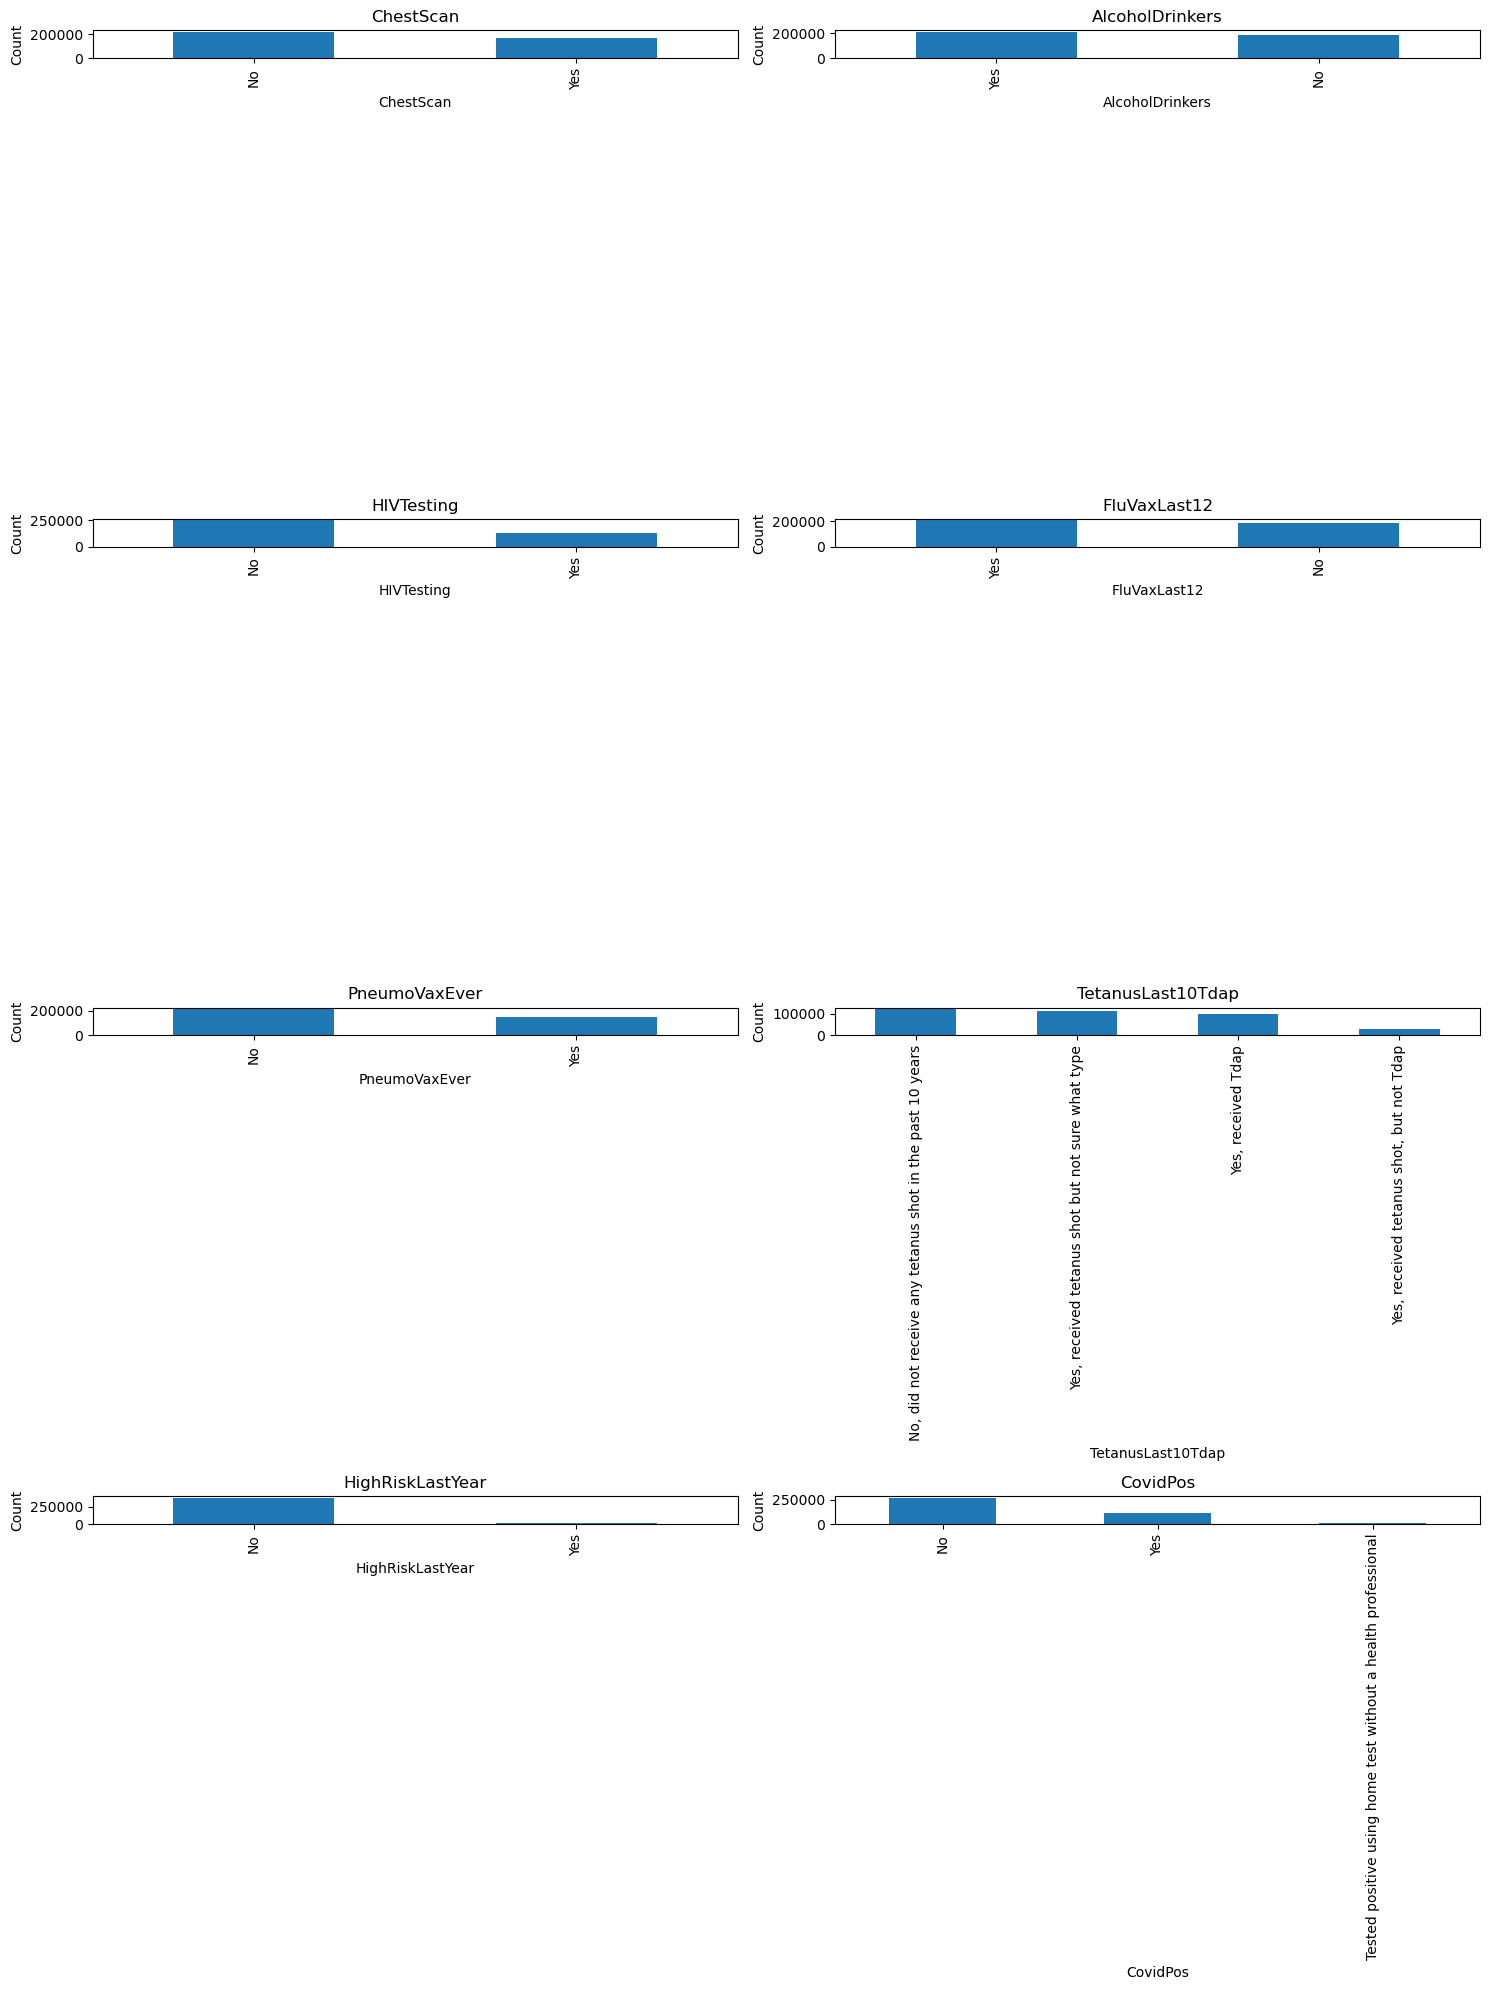

In [ ]:
# Adjusting the height for better visualization of categorical data
plt.figure(figsize=(15, 20))  # Adjusted figure size for better visualization

# Plotting each column in a 4x2 grid
for i, col in enumerate(missing_categorical):
    plt.subplot(4, 2, i + 1)
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Filter out the set of column names to retain, excluding columns with excessive missing values.

In [ ]:
# All columns in the DataFrame
all_columns = data.columns.tolist()

# Columns to consider for dropna (excluding missing_numerical and missing_categorical)
columns_to_consider = [col for col in all_columns if col not in missing_numerical + missing_categorical]

**Handling Missing Value**

In [ ]:
# Dropping rows with NaN in columns except those in missing_numerical and missing_categorical
data_cleaned = data.dropna(subset=columns_to_consider).copy()  # Create a copy here
display(data_cleaned.shape)

(325495, 40)

Impute missing values for columns below.

| Column Types | Column |
|:------- |:------- |
| Numeric  | BMI |
| Categorical  | TetanusLast10Tdap |
| Categorical  | PneumoVaxEver |
| Categorical | HIVTesting |
| Categorical | ChestScan |
| Categorical | CovidPos |
| Categorical | HighRiskLastYear |
| Categorical | FluVaxLast12 |
| Categorical | AlcoholDrinkers |

Imputation: Filling Missing Values in Numeric Columns with Median

In [ ]:
numerical_median_cols = ['BMI']

for col in numerical_median_cols:
    data_cleaned.loc[:, col] = data_cleaned[col].fillna(data_cleaned[col].median())

Imputation: Filling Missing Values in Categorical Columns with Mode

In [ ]:
categorical_mode_cols = ['TetanusLast10Tdap','PneumoVaxEver','HIVTesting','ChestScan',
                         'CovidPos', 'HighRiskLastYear', 'FluVaxLast12', 'AlcoholDrinkers']

for col in categorical_mode_cols:
    mode_value = data_cleaned[col].mode()[0]
    data_cleaned.loc[:, col] = data_cleaned[col].fillna(mode_value)

**Check and Remove Duplicate Data**

In [ ]:
duplicates = data_cleaned[data_cleaned.duplicated(keep=False)]

# Sorting the DataFrame by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=list(duplicates.columns))

duplicates_sorted.reset_index(drop=True, inplace=True)
duplicates_sorted

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.57,47.63,19.20,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
1,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.57,47.63,19.20,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
3,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
4,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
5,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
6,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
7,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
8,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
9,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
# Duplication confirmed, keep first and remove duplicate
data_cleaned = data_cleaned.drop_duplicates(keep='first')

# Number of rows and columns for data_cleaned
display(data_cleaned.shape)

(325484, 40)

**Save cleaned dataset in CSV file**

In [ ]:
data_cleaned.to_csv('data_clean.csv')

### EDA Analysis
*Author: LIU YILIN*

**Data Understanding：**
The table below shows all variables and their descriptions.

| No. | Variables                | Description                                                                 |
|-----|--------------------------|-----------------------------------------------------------------------------|
| 1   | State                    | The state in which the individual resides.                                  |
| 2   | Sex                       | Gender of the individual.                                                   |
| 3   | GeneralHealth             | Self-assessment of general health.                                           |
| 4   | PhysicalHealthDays        | Days with physical health issues in the past 30 days.                       |
| 5   | MentalHealthDays          | Days with mental health issues in the past 30 days.                         |
| 6   | GeneralHealth             | Self-assessment of general health.                                           |
| 7   | LastCheckUpTime           | Self-reported frequency and intensity of physical activity or exercise.     |
| 8   | SleepHours                | Average hours of sleep per night.                                           |
| 9   | RemovedTeeth              | History of tooth removal.                                                   |
| 10  | HadHeartAttack            | History of heart attacks.                                                   |
| 11  | HadAngina                 | History of chest pain.                                                      |
| 12  | HadStroke                 | History of stroke.                                                          |
| 13  | HadAsthma                 | History of breathing problems.                                              |
| 14  | HadSkinCancer             | History of skin cancer.                                                     |
| 15  | HadCOPD                   | History of lung disease.                                                   |
| 16  | HadDepressiveDisorder     | History of depression.                                                      |
| 17  | HadKidneyDisease          | History of kidney problems.                                                 |
| 18  | HadArthritis              | History of joint pain.                                                      |
| 19  | HadDiabetes               | History of high blood sugar.                                                |
| 20  | DeafOrHardOfHearing       | Hearing impairment or deafness.                                             |
| 21  | BlindOrVisionDifficulty   | Visual impairment or difficulty with vision.                                |
| 22  | DifficultyConcentrating   | Trouble in focusing.                                                        |
| 23  | DifficultyWalking         | Trouble walking.                                                            |
| 24  | DifficultyDressingBathing | Trouble with self-care.                                                     |
| 25  | DifficultyErrands         | Trouble with daily tasks.                                                   |
| 26  | SmokerStatus              | Current or former or non-smoker status.                                     |
| 27  | ECigaretteUsage           | Use of e-cigarettes.                                                        |
| 28  | ChestScan                 | History of chest imaging.                                                   |
| 29  | RaceEthnicityCategory     | Racial and ethnic background.                                               |
| 30  | AgeCategory               | Categorization of the individual's age into age ranges.                     |
| 31  | HeightInMeters            | The individual's height in meters.                                          |
| 32  | WeightInKilograms         | The individual's weight is kilograms.                                       |
| 33  | BMI                       | Body mass index.                                                            |
| 34  | AlcoholDrinkers           | Alcohol consumption.                                                        |
| 35  | HVTTesting                | History of HIV testing.                                                     |
| 36  | FluVaxLast12              | Recent flu shot in last 12 months.                                          |
| 37  | PneumoVaxEver             | History of pneumonia vaccination.                                           |
| 38  | TetanusLast10Years        | Tetanus shot in the last 10 years.                                          |
| 39  | HighRiskLastYear          | High-risk status in the previous year.                                       |

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('data_clean.csv').drop(columns=['Unnamed: 0'], errors='ignore')

**Univariate Analysis**

Summarize the statistical information of numerical and categorical columns in the dataset.

In [ ]:
numerical_data_overview = data.describe()
numerical_columns = numerical_data_overview.columns

categorical_columns = data.select_dtypes(include=['object']).columns
categorical_data_overview = data[categorical_columns].describe()

display(data.dtypes)
display(data.shape)
display(numerical_data_overview.T)
display(categorical_data_overview.T)

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

(325484, 40)

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,325484.0,4.075257,8.347798,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,325484.0,4.268072,8.164235,0.00,0.00,0.00,5.00,30.00
SleepHours,325484.0,7.026490,1.437025,1.00,6.00,7.00,8.00,24.00
HeightInMeters,325484.0,1.705709,0.106731,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,325484.0,83.369506,21.332961,22.68,68.04,81.65,95.25,292.57
BMI,325484.0,28.557824,6.481157,12.02,24.21,27.44,31.75,97.65


,count,unique,top,freq
State,325484,54,Washington,19381
Sex,325484,2,Female,168182
GeneralHealth,325484,5,Very good,115464
LastCheckupTime,325484,4,Within past year (anytime less than 12 months ...,260276
PhysicalActivities,325484,2,Yes,253796
RemovedTeeth,325484,4,None of them,178303
HadHeartAttack,325484,2,No,308515
HadAngina,325484,2,No,306516
HadStroke,325484,2,No,312587
HadAsthma,325484,2,No,277012


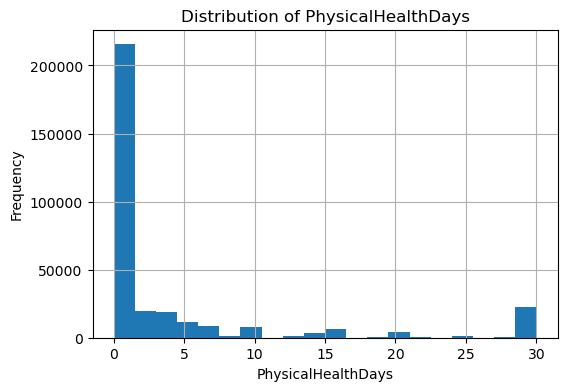

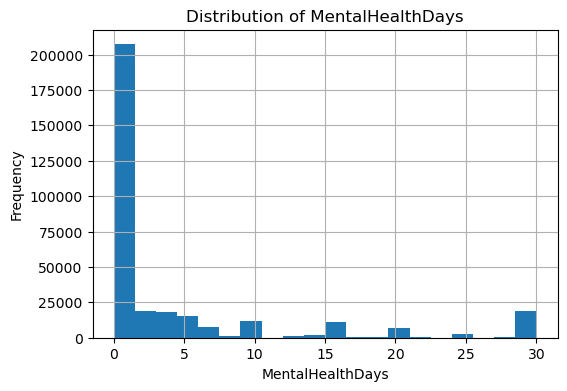

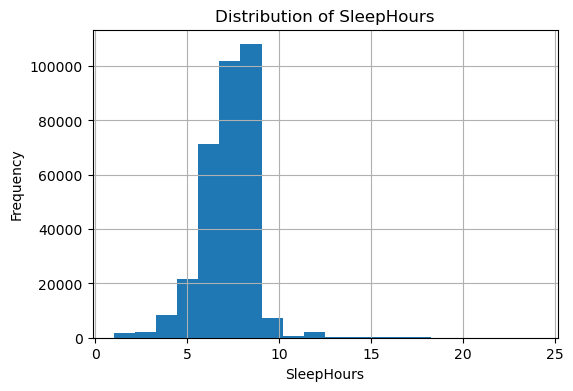

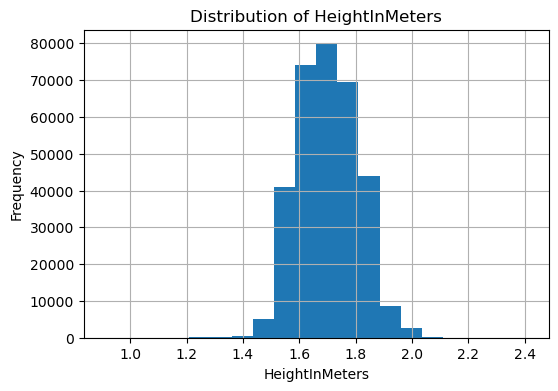

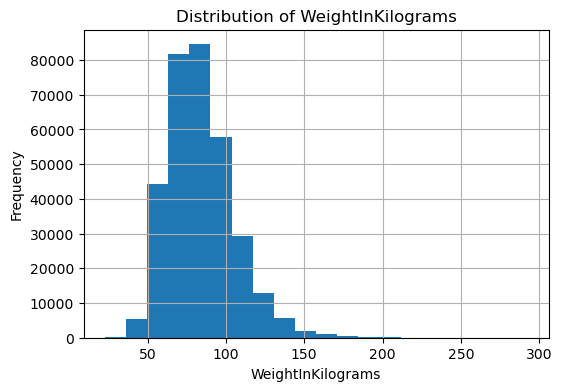

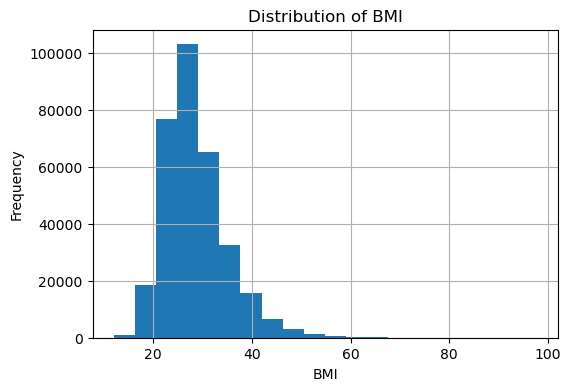

In [ ]:
# Iterate through the numerical columns in the dataset and generate a histogram for each column to visualize data distribution
# and identify potential issues.
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    data[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

PhysicalHealthDays and MentalHealthDays exhibit right-skewed distributions, indicating most individuals experience fewer health issue days. SleepHours is normally distributed, reflecting consistent sleep patterns. WeightInKilograms and BMI also show right-skewed distributions, suggesting lower values for most in the population. HeightInMeters presents a symmetric distribution, denoting a typical range of heights

In [ ]:
# Categorize the categorical variables in the dataset based on their characteristics into ordinal variables, nominal variables, and binary variables.
categorical_columns = data.select_dtypes(include=['object']).columns

# Save different types of categorical variables (ordinal variables, nominal variables, binary variables).
ordinal_variables = []
nominal_variables = []
binary_variables = []

for col in categorical_columns:
    unique_values = data[col].unique()
    num_unique_values = len(unique_values)

    if num_unique_values == 2:
        binary_variables.append(col)
    else:
        if 'AgeCategory' in col or 'Health' in col:
            ordinal_variables.append(col)
        else:
            nominal_variables.append(col)

ordinal_variables, nominal_variables, binary_variables

(['GeneralHealth', 'AgeCategory'],
 ['State',
  'LastCheckupTime',
  'RemovedTeeth',
  'HadDiabetes',
  'SmokerStatus',
  'ECigaretteUsage',
  'RaceEthnicityCategory',
  'TetanusLast10Tdap',
  'CovidPos'],
 ['Sex',
  'PhysicalActivities',
  'HadHeartAttack',
  'HadAngina',
  'HadStroke',
  'HadAsthma',
  'HadSkinCancer',
  'HadCOPD',
  'HadDepressiveDisorder',
  'HadKidneyDisease',
  'HadArthritis',
  'DeafOrHardOfHearing',
  'BlindOrVisionDifficulty',
  'DifficultyConcentrating',
  'DifficultyWalking',
  'DifficultyDressingBathing',
  'DifficultyErrands',
  'ChestScan',
  'AlcoholDrinkers',
  'HIVTesting',
  'FluVaxLast12',
  'PneumoVaxEver',
  'HighRiskLastYear'])

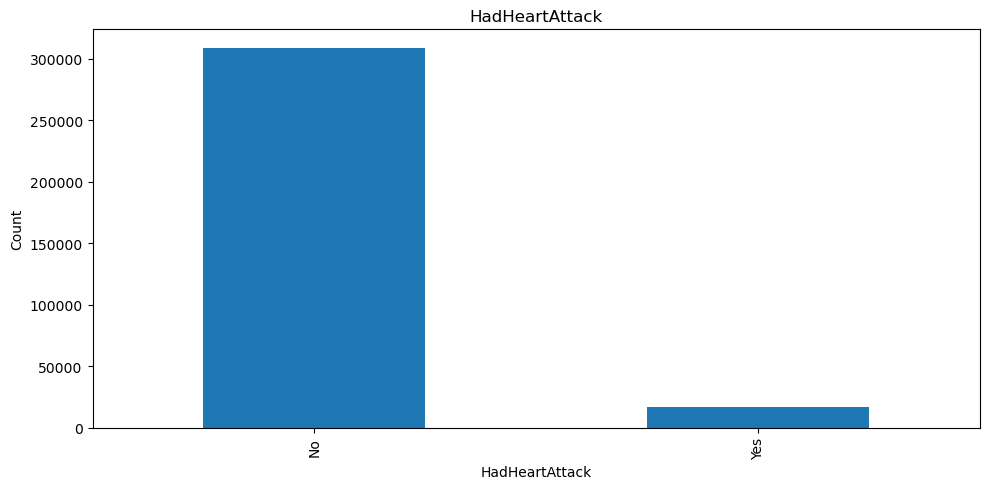

In [ ]:
# Visualize the target variable HadHeartAttack using a bar chart to intuitively display its category distribution.
plt.figure(figsize=(10, 5))

data['HadHeartAttack'].value_counts().plot(kind='bar')
plt.title('HadHeartAttack')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The bar charts for binary categorical variables in the dataset predominantly show imbalanced distributions. Notably, variables like 'Sex' display a relatively even distribution between their categories. However, other variables exhibit significant disparities, with one category markedly outnumbering the other. For instance, a variable might show a large majority of 'Yes' responses compared to 'No', indicating a skewed presence of a particular attribute or condition within the population.

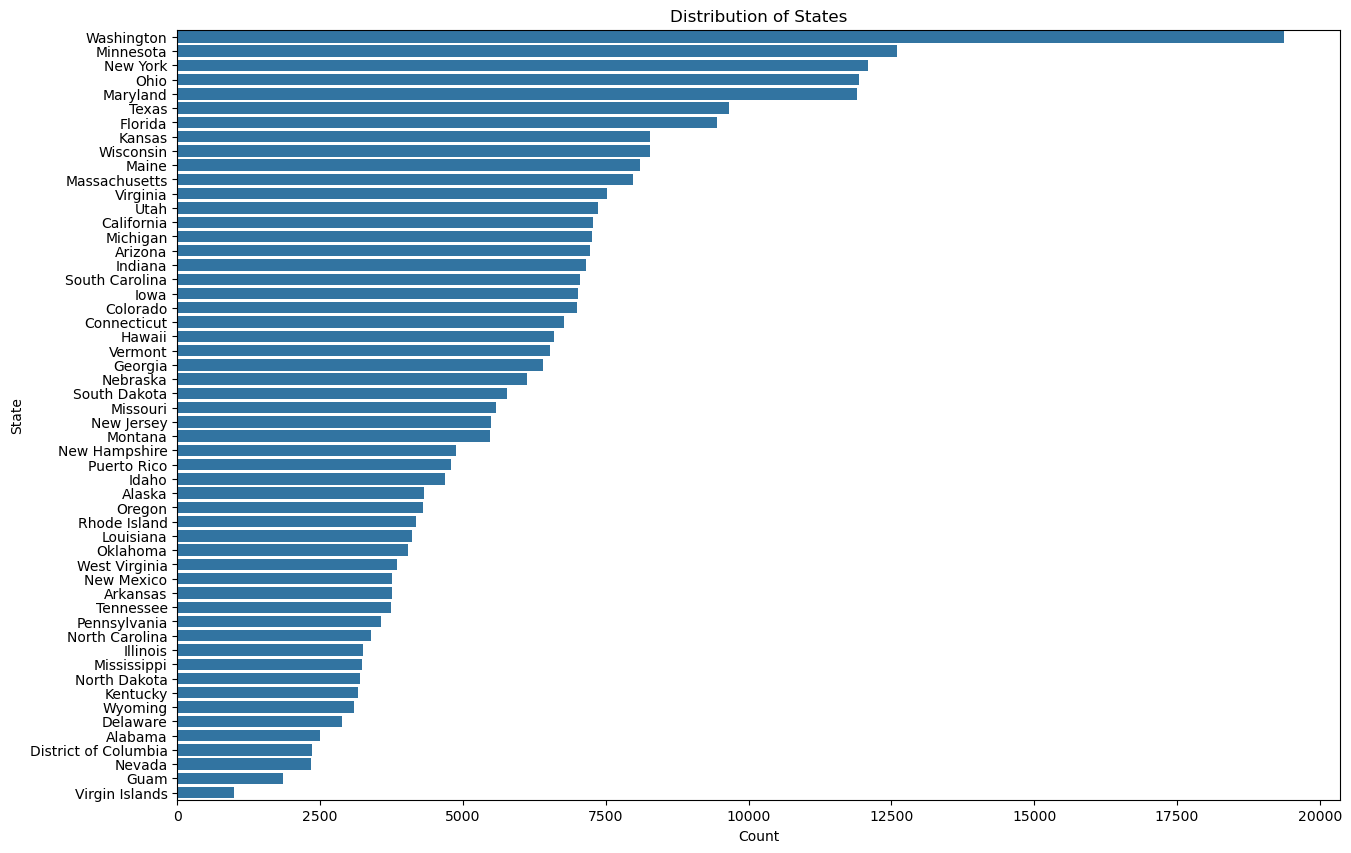

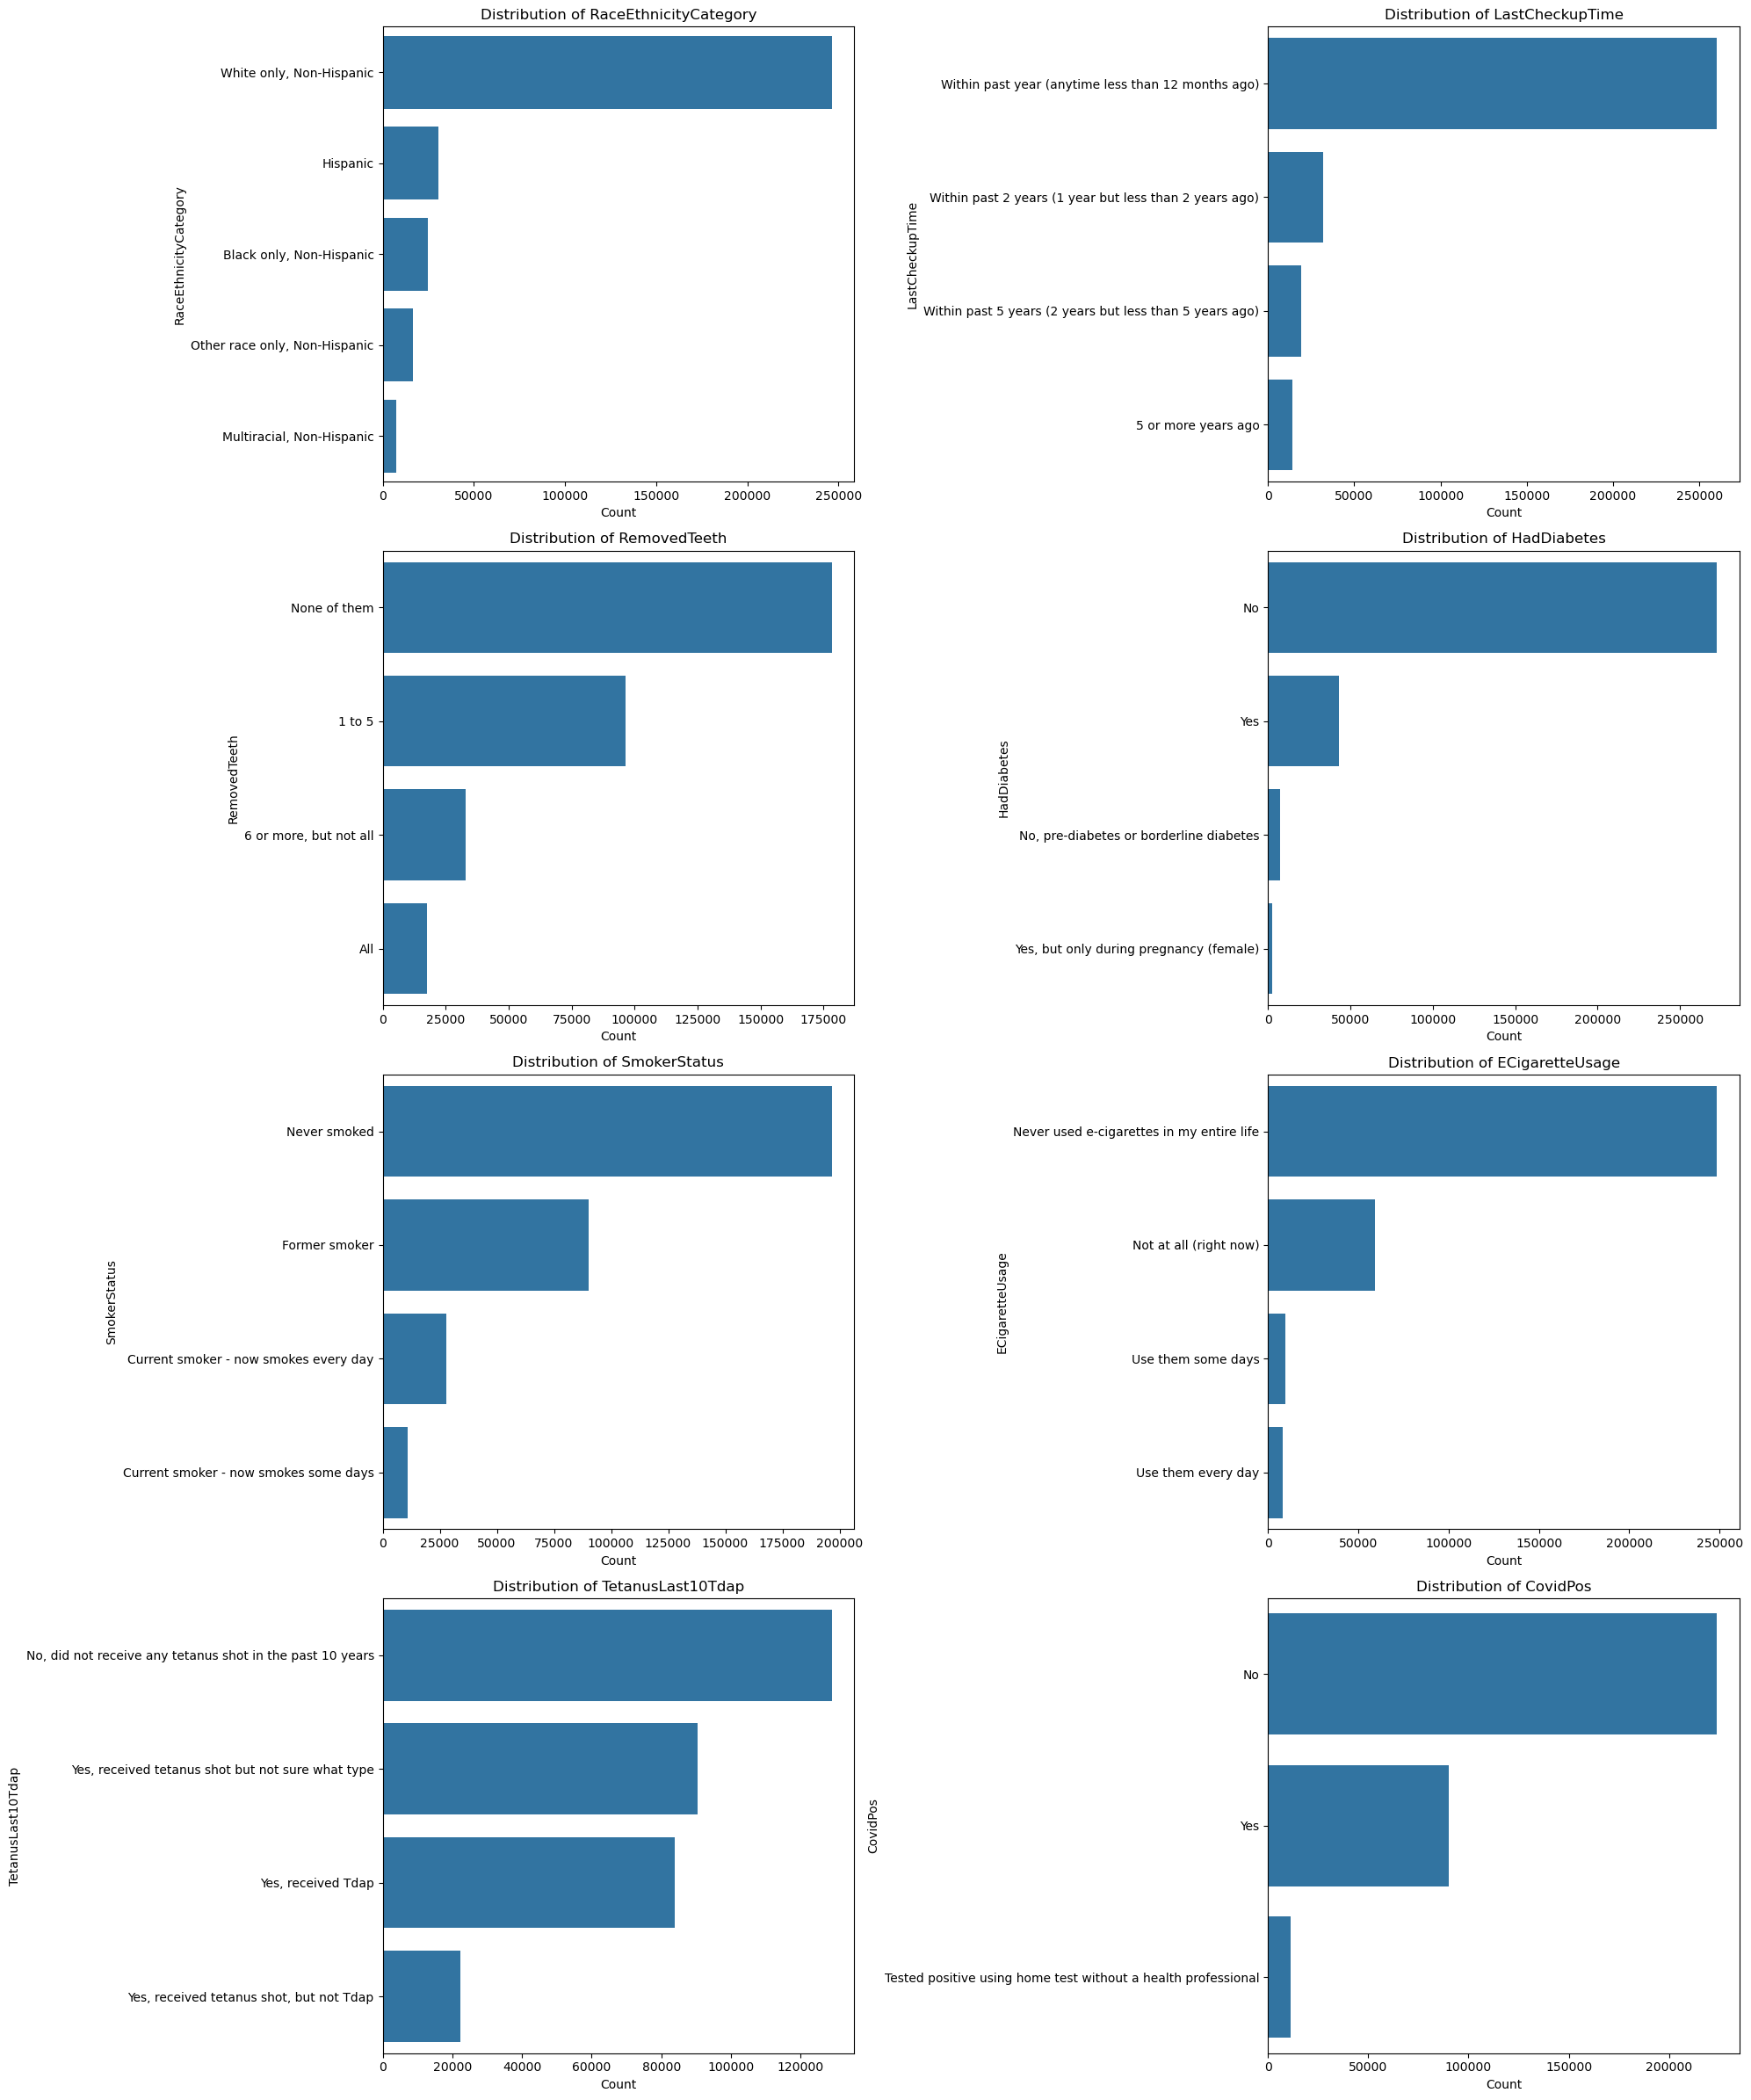

In [ ]:
# Calculate the frequency of each category within each categorical variable
nominal_frequency_counts = {var: data[var].value_counts() for var in nominal_variables}
sorted_nominal_vars_by_category_count = sorted(nominal_variables, key=lambda x: len(nominal_frequency_counts[x]), reverse=True)
variables_with_many_categories = [var for var in sorted_nominal_vars_by_category_count if len(nominal_frequency_counts[var]) > 5]
variables_with_fewer_categories = [var for var in sorted_nominal_vars_by_category_count if len(nominal_frequency_counts[var]) <= 5]

plt.figure(figsize=(15, 10))
sns.countplot(y='State', data=data, order=data['State'].value_counts().index)
plt.title('Distribution of States')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

n_cols = 2
n_rows = len(variables_with_fewer_categories) // n_cols + (len(variables_with_fewer_categories) % n_cols > 0)
plt.figure(figsize=(20, 6 * n_rows))
for i, var in enumerate(variables_with_fewer_categories):
    plt.subplot(n_rows, n_cols, i + 1)
    order = data[var].value_counts().index
    sns.countplot(y=var, data=data, order=order)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

The nominal variables highlight a range of demographic and health-related characteristics within the dataset. In variables like "RaceEthnicityCategory," a dominant category emerges, significantly outnumbering the frequencies of others.

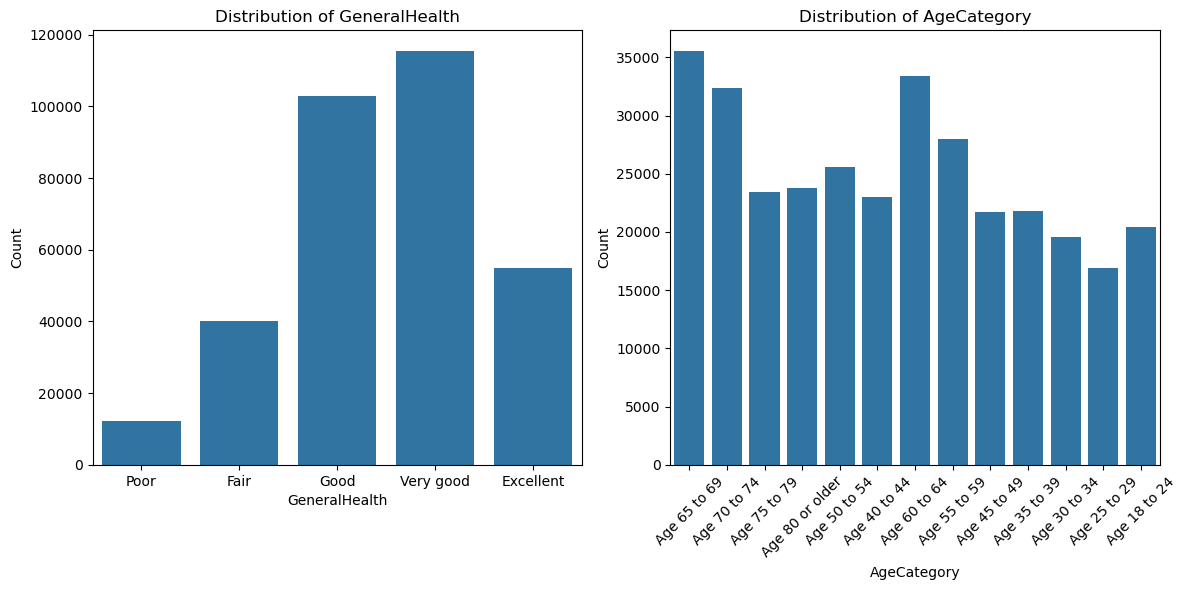

In [ ]:
# # Perform a visual analysis of the distribution for two ordinal variables, GeneralHealth and AgeCategory, by plotting bar charts for each.
plt.figure(figsize=(12, 6))

# Plot for 'GeneralHealth'
plt.subplot(1, 2, 1)
sns.countplot(x='GeneralHealth', data=data, order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
plt.title('Distribution of GeneralHealth')
plt.xlabel('GeneralHealth')
plt.ylabel('Count')

# Plot for 'AgeCategory'
# Assuming 'AgeCategory' is already ordered appropriately in the dataset
plt.subplot(1, 2, 2)
sns.countplot(x='AgeCategory', data=data)
plt.title('Distribution of AgeCategory')
plt.xlabel('AgeCategory')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

General health, skew towards better health ratings, with 'Very good' and 'Good' being the most common responses. For AgeCategory, distribution appears more balanced across different age categories, without a dominant group

**Bivariate Analysis**

In [ ]:
# Retrieve basic information about numerical and categorical variables in the dataset.
numerical_data_overview = data.describe()
numerical_cols = numerical_data_overview.columns
categorical_cols = data.select_dtypes(include=['object']).columns

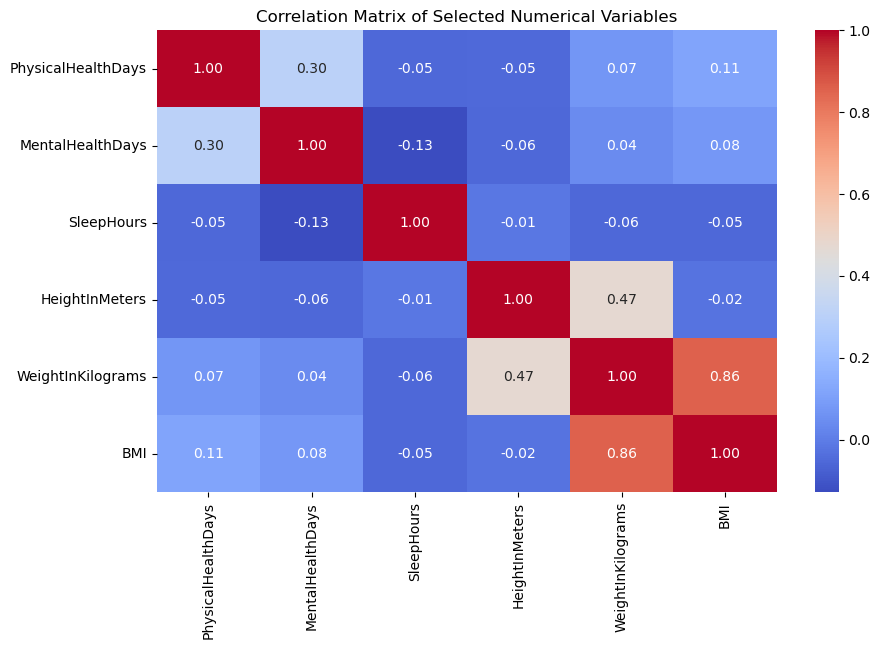

In [ ]:
# Heatmap
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.show()

A moderate positive correlation of 0.30 exists between physical and mental health days, indicating they may rise and fall together. Weight and BMI are highly correlated at 0.86, confirming the dependency of BMI on weight

In [ ]:
def point_biserial_correlation(data, numerical_columns, target_column):
    """
    Calculate Point-Biserial Correlation Coefficient for each numerical column against a binary categorical target column.

    :param data: Pandas DataFrame containing the dataset.
    :param numerical_columns: List of names of the numerical columns.
    :param target_column: Name of the target column.
    :return: DataFrame with Point-Biserial Correlation results - Coefficient and p-value for each numerical feature.
    """
    target_numeric = data[target_column].apply(lambda x: 1 if x == 'Yes' else 0)

    results = []

    for column in numerical_columns:
        coef, p_val = pointbiserialr(data[column], target_numeric)
        results.append([column, coef, p_val])

    results_df = pd.DataFrame(results, columns=['Feature', 'Point-Biserial Coefficient', 'P-Value'])
    return results_df

point_biserial_results_df = point_biserial_correlation(data, numerical_cols, 'HadHeartAttack')
round(point_biserial_results_df.sort_values(by='Point-Biserial Coefficient', ascending=False),3)

,Feature,Point-Biserial Coefficient,P-Value
0,PhysicalHealthDays,0.133,0.000
4,WeightInKilograms,0.037,0.000
5,BMI,0.031,0.000
1,MentalHealthDays,0.022,0.000
3,HeightInMeters,0.021,0.000
2,SleepHours,0.005,0.007


In [ ]:
numerical_relevant_features = [feature for feature in numerical_cols if feature != 'SleepHours']

The results indicate that 'PhysicalHealthDays' has the strongest association with the dependent variable, with a point-biserial coefficient of 0.133 and a p-value of 0, suggesting the correlation is statistically significant. 'WeightInKilograms' and 'BMI' show weaker positive associations, with coefficients of 0.037 and 0.031, respectively, but are still statistically significant with p-values of 0. 'MentalHealthDays' and 'HeightInMeters' have the weakest positive associations, with coefficients of 0.022 and 0.021, but their p-values of 0 denote statistical significance. 'SleepHours' was excluded from the relevant features due to its very weak association

In [ ]:
def chi_square_test(data, categorical_columns, target_column):
    """
    Perform Chi-Square test for each categorical column against the target column.

    :param data: Pandas DataFrame containing the dataset.
    :param categorical_columns: List of names of the categorical columns.
    :param target_column: Name of the target column.
    :return: DataFrame with Chi-Square results - Chi-Square value, p-value, and degrees of freedom.
    """
    results = []

    for column in categorical_columns:
        contingency_table = pd.crosstab(data[column], data[target_column])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        results.append([column, chi2, p, dof])

    results_df = pd.DataFrame(results, columns=['Feature', 'Chi2', 'P-Value', 'Degrees of Freedom'])
    return results_df

chi_square_results_df = chi_square_test(data, categorical_cols, 'HadHeartAttack')
round(chi_square_results_df,3)

,Feature,Chi2,P-Value,Degrees of Freedom
0,State,706.863,0.0,53
1,Sex,1658.014,0.0,1
2,GeneralHealth,12796.915,0.0,4
3,LastCheckupTime,1612.682,0.0,3
4,PhysicalActivities,2223.066,0.0,1
5,RemovedTeeth,9596.566,0.0,3
6,HadHeartAttack,325463.764,0.0,1
7,HadAngina,64706.904,0.0,1
8,HadStroke,10392.691,0.0,1
9,HadAsthma,145.395,0.0,1


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramér's V statistic for two categorical variables.

    :param x: First categorical variable
    :param y: Second categorical variable
    :return: Cramér's V statistic
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Calculate Cramér's V for each categorical variable against the target
cramers_v_results = {}
target = data['HadHeartAttack']

for col in categorical_cols:
    cramers_v_results[col] = cramers_v(data[col], target)

# Store the results in a DataFrame and sort by the highest association
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramers_V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers_V', ascending=False)

cramers_v_df = round(cramers_v_df,2)
cramers_v_df

,Cramers_V
HadHeartAttack,1.00
HadAngina,0.45
GeneralHealth,0.20
AgeCategory,0.18
HadStroke,0.18
RemovedTeeth,0.17
ChestScan,0.16
DifficultyWalking,0.16
HadDiabetes,0.15
HadCOPD,0.13


In [ ]:
# Define the threshold for relevance
threshold = 0.1

# Filter the features based on the threshold
categorical_relevant_features = cramers_v_df[cramers_v_df['Cramers_V'] >= threshold].index.tolist()
categorical_relevant_features

['HadHeartAttack',
 'HadAngina',
 'GeneralHealth',
 'AgeCategory',
 'HadStroke',
 'RemovedTeeth',
 'ChestScan',
 'DifficultyWalking',
 'HadDiabetes',
 'HadCOPD',
 'PneumoVaxEver',
 'HadArthritis',
 'HadKidneyDisease',
 'DeafOrHardOfHearing',
 'SmokerStatus']

'HadHeartAttack' has a perfect association of 1, likely indicating a direct relationship or overlap with the dependent variable. 'HadAngina' shows a strong association with a coefficient of 0.45. 'GeneralHealth', 'AgeCategory', 'HadStroke', 'RemovedTeeth', 'ChestScan', and 'DifficultyWalking' have moderate associations ranging from 0.16 to 0.2. 'HadDiabetes', 'HadCOPD', 'PneumoVaxEver', and 'HadArthritis' exhibit associations just above the cutoff, with values between 0.12 and 0.15. Features with a Cramér's V less than 0.10 are considered weakly associated and are thus excluded from the analysis.

In [ ]:
features_data = data[numerical_relevant_features+categorical_relevant_features]
features_data.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'HadHeartAttack', 'HadAngina',
       'GeneralHealth', 'AgeCategory', 'HadStroke', 'RemovedTeeth',
       'ChestScan', 'DifficultyWalking', 'HadDiabetes', 'HadCOPD',
       'PneumoVaxEver', 'HadArthritis', 'HadKidneyDisease',
       'DeafOrHardOfHearing', 'SmokerStatus'],
      dtype='object')

**Futher Preprocessing**

In [ ]:
# Checking for missing values
missing_values = features_data.isnull().sum().sort_values(ascending=False)

# Detecting outliers using IQR method for numerical columns
def detect_outliers(df, cols):
    outlier_indices = []

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

numerical_cols = features_data.select_dtypes(include=['float64', 'int64']).columns
outlier_indices = detect_outliers(features_data, numerical_cols)

# Overview of outliers
outliers_overview = features_data.iloc[outlier_indices].describe()

missing_values, outliers_overview.shape

(PhysicalHealthDays     0
 MentalHealthDays       0
 DeafOrHardOfHearing    0
 HadKidneyDisease       0
 HadArthritis           0
 PneumoVaxEver          0
 HadCOPD                0
 HadDiabetes            0
 DifficultyWalking      0
 ChestScan              0
 RemovedTeeth           0
 HadStroke              0
 AgeCategory            0
 GeneralHealth          0
 HadAngina              0
 HadHeartAttack         0
 BMI                    0
 WeightInKilograms      0
 HeightInMeters         0
 SmokerStatus           0
 dtype: int64,
 (8, 5))

### Feature Engineering
*Author:LIU YILIN*

In [ ]:
data_encoded = features_data.copy()
print(data_encoded['GeneralHealth'].unique())
print(data_encoded['AgeCategory'].unique())

['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
['Age 65 to 69' 'Age 70 to 74' 'Age 75 to 79' 'Age 80 or older'
 'Age 50 to 54' 'Age 40 to 44' 'Age 60 to 64' 'Age 55 to 59'
 'Age 45 to 49' 'Age 35 to 39' 'Age 30 to 34' 'Age 25 to 29'
 'Age 18 to 24']


In [ ]:
ordinal_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
data_encoded['GeneralHealth'] = data_encoded['GeneralHealth'].map(ordinal_mapping)
data_encoded['GeneralHealth']

age_ranges = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
    'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
    'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
    'Age 80 or older'
]
ordinal_age_map = {age_range: i for i, age_range in enumerate(age_ranges)}

data_encoded['AgeCategory'] = data_encoded['AgeCategory'].map(ordinal_age_map)
data_encoded['AgeCategory']
data_encoded[['GeneralHealth','AgeCategory']]

,GeneralHealth,AgeCategory
0,3,9
1,3,10
2,1,10
3,3,11
4,1,12
...,...,...
325479,2,9
325480,2,2
325481,2,0
325482,4,6


In [ ]:
# Extracting the list of numerical and categorical features from data_encoded
final_numerical_features = [feature for feature in data_encoded.columns if data_encoded[feature].dtype in ['int64', 'float64']]
final_categorical_features = [feature for feature in data_encoded.columns if feature not in final_numerical_features]

# Checking the number of unique values for the categorical features
binary_categorical_features = []
non_binary_categorical_features = []

for feature in final_categorical_features:
    unique_values = data[feature].nunique()
    if unique_values == 2:
        binary_categorical_features.append(feature)
    else:
        non_binary_categorical_features.append(feature)

# Output the binary and non-binary categorical features
binary_categorical_features, non_binary_categorical_features

(['HadHeartAttack',
  'HadAngina',
  'HadStroke',
  'ChestScan',
  'DifficultyWalking',
  'HadCOPD',
  'PneumoVaxEver',
  'HadArthritis',
  'HadKidneyDisease',
  'DeafOrHardOfHearing'],
 ['RemovedTeeth', 'HadDiabetes', 'SmokerStatus'])

In [ ]:
# Encode binary categorical features as 0 and 1
for feature in binary_categorical_features:
    unique_vals = data_encoded[feature].unique()
    mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
    data_encoded[feature] = data_encoded[feature].map(mapping)

# Apply OneHotEncoder to non-binary categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data_encoded[non_binary_categorical_features])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(non_binary_categorical_features))
data_encoded.drop(non_binary_categorical_features, axis=1, inplace=True)
data_encoded = pd.concat([data_encoded, encoded_features_df], axis=1)

data_encoded.head()

,PhysicalHealthDays,MentalHealthDays,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,GeneralHealth,AgeCategory,HadStroke,...,RemovedTeeth_All,RemovedTeeth_None of them,HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked
0,4.0,0.0,1.60,71.67,27.99,0,0,3,9,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.78,95.25,30.13,0,0,3,10,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,30.0,0.0,1.83,88.45,26.45,0,0,1,10,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.85,108.86,31.66,0,0,3,11,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,0.0,1.70,90.72,31.32,0,0,1,12,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Separating features and target variable
X = data_encoded.drop('HadHeartAttack', axis=1)  # Features
y = data_encoded['HadHeartAttack']               # Target

# Initializing the StandardScaler Z-Score Scalling
scaler = StandardScaler()

# Applying Standard Scaling to the features
X_scaled = scaler.fit_transform(X)

# Creating a DataFrame from the scaled features
df = pd.DataFrame(X_scaled, columns=X.columns)
df['HadHeartAttack'] = y  # Adding the target variable back correctly

df.head()

,PhysicalHealthDays,MentalHealthDays,HeightInMeters,WeightInKilograms,BMI,HadAngina,GeneralHealth,AgeCategory,HadStroke,ChestScan,...,RemovedTeeth_None of them,HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,HadHeartAttack
0,-0.009015,-0.522777,-0.990418,-0.548425,-0.087612,-0.248762,0.491596,0.694021,-0.203123,-0.811282,...,0.908545,0.440671,-0.15019,-0.390071,-0.092546,-0.305654,-0.185186,1.614209,-1.235167,0
1,-0.488184,-0.522777,0.696061,0.556909,0.242577,-0.248762,0.491596,0.974685,-0.203123,-0.811282,...,0.908545,-2.269265,-0.15019,2.563633,-0.092546,-0.305654,-0.185186,1.614209,-1.235167,0
2,3.105583,-0.522777,1.164527,0.238153,-0.325224,-0.248762,-1.453052,0.974685,-0.203123,-0.811282,...,-1.100661,0.440671,-0.15019,-0.390071,-0.092546,-0.305654,-0.185186,1.614209,-1.235167,0
3,-0.488184,-0.522777,1.351914,1.194890,0.478646,-0.248762,0.491596,1.255350,-0.203123,1.232616,...,-1.100661,0.440671,-0.15019,-0.390071,-0.092546,-0.305654,-0.185186,1.614209,-1.235167,0
4,0.110777,-0.522777,-0.053486,0.344561,0.426186,-0.248762,-1.453052,1.536015,-0.203123,-0.811282,...,0.908545,0.440671,-0.15019,-0.390071,-0.092546,-0.305654,-0.185186,-0.619498,0.809607,0


### Model training and optimization
*Author: MENG HUIDAN*

**Separate training set, validation set and test set.**

In [ ]:
# Separate training set, validation set and test set.
# Randomly partition the data using an 8:1:1 ratio.
from sklearn.model_selection import train_test_split

X = df.drop(['HadHeartAttack'], axis=1)
y = df['HadHeartAttack']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Logistic regression**

Finding the best parameters: This method may take some time to run. You can choose to skip it and directly use the model training code below that already uses the best parameters.

In [ ]:
# Finding the Optimal Parameters for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parameter search range
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [50, 100]
}

lr = LogisticRegression()

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Optimal parameters: ", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# Using an algorithm that penalizes imbalance In logistic regression, adjust class_weight="balanced" so that the model gives a higher weight to class 1.
# Define model
best_params = {'penalty': 'l2', 'C': 0.01, 'solver': 'liblinear', 'max_iter': 100}
lr_model = LogisticRegression(**best_params, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

**Random forest**

Finding the best parameters: This method may take some time to run. You can choose to skip it and directly use the model training code below that already uses the best parameters.

In [ ]:
# Finding the Optimal Parameters for Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter search range
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Output the best parameters and scores
print("Best parameters found: ", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
best_params = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10}
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

**XGBoost**

Finding the best parameters: This method may take some time to run. You can choose to skip it and directly use the model training code below that already uses the best parameters.

In [ ]:
# Finding the Optimal Parameters for XGBoost
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
#
param_grid = {
    "max_depth": [3, 9],
    "learning_rate": [0.1, 0.2],
    "n_estimators": [100, 500],
    "subsample": [0.6, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [1, 5]  # 用于不平衡数据
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, random_state=42, eval_metric="logloss"),
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [ ]:
# XGBoost is one of the implementations of gradient boosting trees and is suitable for complex nonlinear relationships between features.
from xgboost import XGBClassifier

# XGBoost model
best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.6}
xgb_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)

[21:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

**LightGBM**

Finding the best parameters: This method may take some time to run. You can choose to skip it and directly use the model training code below that already uses the best parameters.

In [ ]:
# Finding the Optimal Parameters for LightGBM
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

X_train.columns = X_train.columns.str.replace(r"[^\w]", "_", regex=True)
X_val.columns = X_val.columns.str.replace(r"[^\w]", "_", regex=True)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [50, 70],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgb_model = lgb.LGBMClassifier(random_state=42)

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[LightGBM] [Info] Number of positive: 19878, number of negative: 324060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 343938, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057795 -> initscore=-2.791315
[LightGBM] [Info] Start training from score -2.791315
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 50, 'n_estimators': 100, 'num_leaves': 70, 'subsample': 0.8}
Best CV Score: 0.9453273546467106


In [ ]:
# LightGBM is another efficient implementation of gradient boosted trees suitable for large-scale data.
import lightgbm as lgb
X_train.columns = X_train.columns.str.replace(r"[^\w]", "_", regex=True)  # Replace non-alphanumeric characters with underscores
X_val.columns = X_val.columns.str.replace(r"[^\w]", "_", regex=True)

# Defining the LightGBM model
best_params = {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'num_leaves': 70, 'min_child_samples': 50, 'subsample': 0.8, 'colsample_bytree':0.8}
lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 19878, number of negative: 324060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 343938, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.057795 -> initscore=-2.791315
[LightGBM] [Info] Start training from score -2.791315


LGBMClassifier(colsample_bytree=0.8, max_depth=10, min_child_samples=50,
               num_leaves=70, random_state=42, subsample=0.8)

### Model Evaluation
*Author: XIAO WANJUN*

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Logistic regression model evaluation
# Get the probability of the positive class
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Classification Report:\n")
print(classification_report(y_val, y_pred_lr))
print("Logistic Regression AUC:", roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1]))

# Random Forest Model Evaluation
y_pred_rf = rf_model.predict(X_val)
print()
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_val, y_pred_rf))
# Calculate AUC
print("Random Forest AUC:", roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1]))

# XGBoost Model Evaluation
y_pred_xgb = xgb_model.predict(X_val)
print()
print("XGBoost Classification Report:\n")
print(classification_report(y_val, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1]))

# LightGBM model evaluation
y_pred_lgb = lgb_model.predict(X_val)
print()
print("\nLightGBM Classification Report:\n")
print(classification_report(y_val, y_pred_lgb))
print("LightGBM AUC:", roc_auc_score(y_val, lgb_model.predict_proba(X_val)[:, 1]))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40550
           1       0.55      0.21      0.30      2442

    accuracy                           0.95     42992
   macro avg       0.75      0.60      0.64     42992
weighted avg       0.93      0.95      0.93     42992

Logistic Regression AUC: 0.879262954805495


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40550
           1       0.58      0.15      0.24      2442

    accuracy                           0.95     42992
   macro avg       0.76      0.57      0.61     42992
weighted avg       0.93      0.95      0.93     42992

Random Forest AUC: 0.8766606024250907

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40550
           1       0.55      0.21      

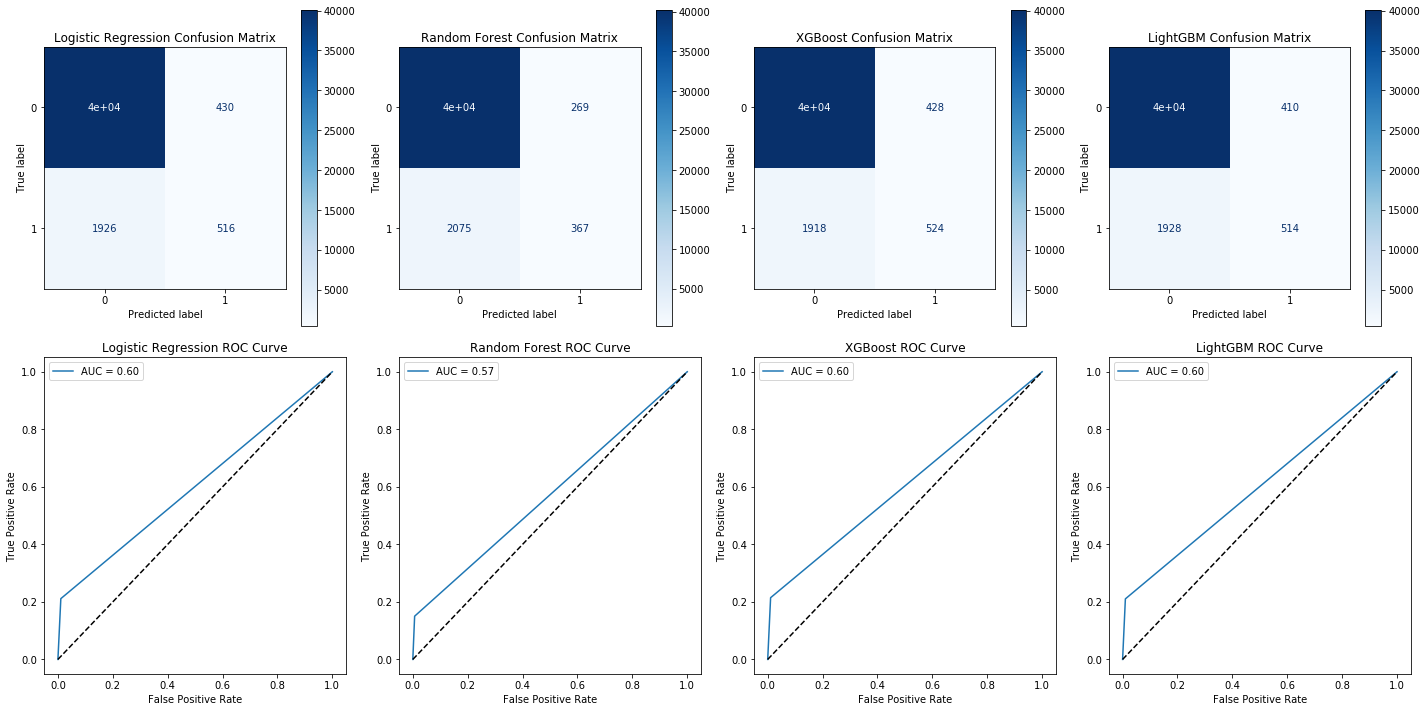

In [ ]:
# Confusion matrix and ROC curve visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# y_val The true labels of the validation set
# Prediction results
y_pred_lr = lr_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_lgb = lgb_model.predict(X_val)

# Compute confusion matrix and AUC
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgb
}

# Create a graph
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Confusion Matrix Visualization
for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[0, i], cmap=plt.cm.Blues)
    axes[0, i].set_title(f"{model_name} Confusion Matrix")

# ROC Curve Visualization
for i, (model_name, y_pred) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    axes[1, i].plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    axes[1, i].plot([0, 1], [0, 1], 'k--')
    axes[1, i].set_xlabel('False Positive Rate')
    axes[1, i].set_ylabel('True Positive Rate')
    axes[1, i].set_title(f"{model_name} ROC Curve")
    axes[1, i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

### Risk prediction and interventions
*Author：MENG HUIDAN*

In [ ]:
import joblib
feature_columns = X_train.columns.tolist()

joblib.dump(xgb_model, "xgb_42features_model.pkl")  # 保存为 .pkl 文件
print("The model has been saved as xgb_42features_model.pkl")
joblib.dump(feature_columns, "xgb_42features_columns.pkl")

The model has been saved as xgb_42features_model.pkl


['xgb_42features_columns.pkl']

**Risk prediction**

In [ ]:
# Load model
model_res = joblib.load("xgb_42features_model.pkl")
feature_columns = joblib.load("xgb_42features_columns.pkl")

# Load user input sample data (please obtain user input according to the actual situation)
user_input = {
    "PhysicalHealthDays":5,
    "MentalHealthDays": 10,
    "BMI": 23,
    "HeightInMeters": 1.55,
    "WeightInKilograms": 70.68,
    "GeneralHealth": "Poor",
    "SmokerStatus": "Yes",
    "AgeCategory": "Age 30 to 34",
    "RemovedTeeth": "None of them",
    "HadStroke": "Yes",
    "PneumoVaxEver": "No",
    "HadArthritis": "No",
    "HadKidneyDisease": "Yes",
    "DeafOrHardOfHearing": "Yes",
    "HadHeartAttack": "No",
    "HadAngina": "Yes",
    "ChestScan": "No",
    "DifficultyWalking": "Yes",
    "HadDiabetes": "Yes",
    "HadCOPD": "Yes"
}
# Data preprocessing function
def preprocess_input(user_input):
    user_input_scaled = scaler.fit_transform([[user_input[col] for col in numerical_columns]])[0]
    numerical_input = dict(zip(numerical_columns, user_input_scaled))

    one_hot_encoded_input = {}
    for value in general_health_values:
        one_hot_encoded_input[f"GeneralHealth_{value}"] = 1 if user_input["GeneralHealth"] == value else 0
    for value in smoker_status_values:
        one_hot_encoded_input[f"SmokerStatus_{value}"] = 1 if user_input["SmokerStatus"] == value else 0
    for value in age_category_values:
        one_hot_encoded_input[f"AgeCategory_{value}"] = 1 if user_input["AgeCategory"] == value else 0
    for value in removed_teeth_values:
        one_hot_encoded_input[f"RemovedTeeth_{value}"] = 1 if user_input["RemovedTeeth"] == value else 0

    def binary_encoder(value):
        return 1 if value == "Yes" else 0

    binary_encoded_input = {col: binary_encoder(user_input[col]) for col in binary_columns}

    all_features = {**numerical_input, **one_hot_encoded_input, **binary_encoded_input}
    input_features = [all_features[col] if col in all_features else 0 for col in feature_columns]
    return np.array(input_features).reshape(1, -1)

# Convert to model input format (make sure the column order is consistent with training)
input_features = input_features = preprocess_input(user_input)

# Convert to NumPy array and predict
input_features = np.array(input_features).reshape(1, -1)
risk_probability = model_res.predict_proba(input_features)[:, 1][0]  # Probability of getting sick
risk_class = model_res.predict(input_features)[0]  # Classification results

# Output prediction results
print("heart disease risk probability:", round(risk_probability * 100, 2), "%")
print("Prediction category:", "high risk" if risk_class == 1 else "low risk")

heart disease risk probability: 66.59 %
Prediction category: high risk


**Interventions**

In [ ]:
# prediction function
def predict_risk(user_input):
    input_features = preprocess_input(user_input)
    risk_probability = xgb_model.predict_proba(input_features)[:, 1][0]
    risk_class = xgb_model.predict(input_features)[0]
    return round(risk_probability * 100, 2), "high risk" if risk_class == 1 else "low risk"
# Intervention simulation
interventions = {
    "Quit smoking": lambda input_data: {**input_data, "SmokerStatus": "No"},
    "Lose weight": lambda input_data: {**input_data, "BMI": max(18.5, input_data["BMI"] - 5)},
    "Improve mental health": lambda input_data: {**input_data, "MentalHealthDays": max(0, input_data["MentalHealthDays"] - 5)},
    "Reduce physical health problems": lambda input_data: {**input_data, "PhysicalHealthDays": max(0, input_data["PhysicalHealthDays"] - 5)},
    "Increase physical activity": lambda input_data: {**input_data, "DifficultyWalking": "No"},
    "Improve general health": lambda input_data: {**input_data, "GeneralHealth": "Excellent"},
    "Improve diet and oral health": lambda input_data: {**input_data, "RemovedTeeth": "None of them"},
    "Manage diabetes effectively": lambda input_data: {**input_data, "HadDiabetes": "No"},
    "Reduce heart-related risk factors": lambda input_data: {
        **input_data,
        "HadStroke": "No",
        "HadHeartAttack": "No",
        "HadAngina": "No",
        "ChestScan": "No",
    },
    "Improve respiratory health": lambda input_data: {**input_data, "HadCOPD": "No"},
    "Enhance kidney health": lambda input_data: {**input_data, "HadKidneyDisease": "No"},
    "Address arthritis issues": lambda input_data: {**input_data, "HadArthritis": "No"},
    "Assist hearing health": lambda input_data: {**input_data, "DeafOrHardOfHearing": "No"},
    "Encourage vaccination": lambda input_data: {**input_data, "PneumoVaxEver": "Yes"},
    "Encourage regular health check-ups": lambda input_data: {**input_data, "ChestScan": "No"},
}


# initial risks
initial_probability, initial_class = predict_risk(user_input)
print("Initial heart disease risk probability:", initial_probability, "%")
print("Initial prediction category:", initial_class)

# Apply interventions and predict effects
for name, intervention in interventions.items():
    modified_input = intervention(user_input)
    new_probability, new_class = predict_risk(modified_input)
    print(f"\nInterventions: {name}")
    print("Probability of heart disease risk after intervention:", new_probability, "%")
    print(":", new_class)

Initial heart disease risk probability: 66.59 %
Initial prediction category: high risk

Interventions: Quit smoking
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Lose weight
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Improve mental health
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Reduce physical health problems
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Increase physical activity
Probability of heart disease risk after intervention: 68.64 %
: high risk

Interventions: Improve general health
Probability of heart disease risk after intervention: 50.39 %
: high risk

Interventions: Improve diet and oral health
Probability of heart disease risk after intervention: 66.59 %
: high risk

Interventions: Manage diabetes effectively
Probability of heart disease risk after intervention: 55.51 %
: high risk

Interv

### Deployment
*Author: *

In [ ]:
#add-scaler.pkl
import joblib
joblib.dump(scaler, "scaler.pkl")

In [ ]:
!pip install streamlit -q

In [ ]:
#app.py
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.preprocessing import StandardScaler

# Configure Streamlit page
st.set_page_config(
    page_title="Heart Disease Risk Prediction",
    page_icon="❤️",
    layout="wide"
)

# Add error handling for model loading
@st.cache_resource
def load_model_files():
    try:
        model_path = "logistic_regression_model.pkl"
        features_path = "feature_columns.pkl"
        scaler_path = "scaler.pkl"

        if not all(os.path.exists(path) for path in [model_path, features_path, scaler_path]):
            raise FileNotFoundError("One or more model files are missing")

        lr_model = joblib.load(model_path)
        feature_columns = joblib.load(features_path)
        scaler = joblib.load(scaler_path)
        return lr_model, feature_columns, scaler
    except Exception as e:
        st.error(f"Error loading model files: {str(e)}")
        return None, None, None

# Load the models
lr_model, feature_columns, scaler = load_model_files()

# Define constants with reordered age categories
CATEGORICAL_MAPPINGS = {
    "GeneralHealth": ["Poor", "Fair", "Good", "VeryGood", "Excellent"],
    "SmokerStatus": ["Current smoker - now smokes every day", "Current smoker - now smokes some days",
                     "Former smoker", "Never smoked"],
    "AgeCategory": ["Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39",
                    "Age 40 to 44", "Age 50 to 54", "Age 55 to 59", "Age 60 to 64",
                    "Age 65 to 69", "Age 70 to 74", "Age 75 to 79", "Age 80 or older"],
    "RemovedTeeth": ["None of them", "1 to 5", "6 or more, but not all", "All"]
}

BINARY_COLUMNS = [
    "HadStroke", "PneumoVaxEver", "HadArthritis", "HadKidneyDisease",
    "DeafOrHardOfHearing", "HadAngina", "ChestScan",
    "DifficultyWalking", "HadDiabetes", "HadCOPD"
]

NUMERICAL_COLUMNS = [
    "PhysicalHealthDays", "MentalHealthDays", "BMI",
    "HeightInMeters", "WeightInKilograms"
]

# Previous preprocessing functions remain the same
def preprocess_input(user_input, feature_columns, scaler):
    try:
        input_df = pd.DataFrame([user_input])
        numerical_data = input_df[NUMERICAL_COLUMNS]
        scaled_numerical = scaler.transform(numerical_data)
        processed_data = pd.DataFrame(0, index=[0], columns=feature_columns)

        for idx, col in enumerate(NUMERICAL_COLUMNS):
            processed_data[col] = scaled_numerical[0][idx]

        for category, values in CATEGORICAL_MAPPINGS.items():
            selected_value = user_input[category]
            for value in values:
                col_name = f"{category}_{value}"
                if col_name in feature_columns:
                    processed_data[col_name] = 1 if selected_value == value else 0

        for col in BINARY_COLUMNS:
            if col in feature_columns:
                processed_data[col] = 1 if user_input[col] == "Yes" else 0

        return processed_data
    except Exception as e:
        st.error(f"Error in preprocessing: {str(e)}")
        return None

def calculate_risk(input_data):
    processed_input = preprocess_input(input_data, feature_columns, scaler)
    if processed_input is not None:
        risk_probability = lr_model.predict_proba(processed_input)[:, 1][0]
        risk_class = lr_model.predict(processed_input)[0]
        return risk_probability, risk_class
    return None, None

def display_risk_results(risk_probability, risk_class):
    res_col1, res_col2 = st.columns(2)

    res_col1.metric(
        label="Risk Probability",
        value=f"{risk_probability * 100:.1f}%"
    )

    risk_status = "High Risk" if risk_class == 1 else "Low Risk"
    res_col2.metric(
        label="Risk Category",
        value=risk_status,
        delta="Seek medical advice" if risk_class == 1 else "Monitor health"
    )

    if risk_probability < 0.3:
        st.success("Low risk level detected. Continue maintaining healthy habits.")
    elif risk_probability < 0.7:
        st.warning("Moderate risk level detected. Consider consulting a healthcare provider.")
    else:
        st.error("High risk level detected. Please consult a healthcare provider soon.")

def main():
    st.title("❤️ Heart Disease Risk Prediction")
    st.write("Enter patient information to predict heart disease risk")

    if any(x is None for x in [lr_model, feature_columns, scaler]):
        st.error("Error: Model files could not be loaded. Please check if all required files are present.")
        return

    tab1, tab2 = st.tabs(["Risk Prediction", "Intervention Simulation"])

    with tab1:
        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Health Metrics")
            user_input = {}

            user_input["PhysicalHealthDays"] = st.slider(
                "Physical Health Days (Days not feeling well)",
                min_value=0, max_value=30, value=5,
                help="Number of days physical health was not good in the past 30 days"
            )
            user_input["MentalHealthDays"] = st.slider(
                "Mental Health Days (Days not feeling well)",
                min_value=0, max_value=30, value=5,
                help="Number of days mental health was not good in the past 30 days"
            )

            height = st.number_input("Height (meters)", min_value=1.0, max_value=2.5, value=1.70)
            weight = st.number_input("Weight (kg)", min_value=30.0, max_value=200.0, value=70.0)
            bmi = weight / (height ** 2)
            st.info(f"Calculated BMI: {bmi:.1f}")

            user_input["HeightInMeters"] = height
            user_input["WeightInKilograms"] = weight
            user_input["BMI"] = bmi

        with col2:
            st.subheader("Health Conditions")
            for category, values in CATEGORICAL_MAPPINGS.items():
                user_input[category] = st.selectbox(
                    category.replace("Category", "").replace("Status", ""),
                    values,
                    key=f"pred_{category}"
                )

            for col in BINARY_COLUMNS:
                display_name = col.replace("Had", "Has ").replace("Or", " or ")
                user_input[col] = st.selectbox(
                    display_name,
                    ["No", "Yes"],
                    key=f"pred_{col}"
                )

        if st.button("Predict Risk", type="primary", key="predict_button"):
            with st.spinner("Calculating risk..."):
                risk_probability, risk_class = calculate_risk(user_input)
                if risk_probability is not None:
                    st.header("Prediction Results")
                    display_risk_results(risk_probability, risk_class)
                    st.session_state['baseline_risk'] = risk_probability
                    st.session_state['user_input'] = user_input.copy()

    with tab2:
        st.subheader("Intervention Simulation")
        st.write("Explore how lifestyle changes might affect your heart disease risk")

        if 'baseline_risk' not in st.session_state:
            st.warning("Please complete a risk prediction first before simulating interventions.")
            return

        modified_input = st.session_state['user_input'].copy()

        # Create three columns for more organized intervention options
        sim_col1, sim_col2, sim_col3 = st.columns(3)

        with sim_col1:
            st.markdown("#### Physical Health Improvements")

            # BMI and weight management
            target_bmi = st.slider(
                "Target BMI",
                min_value=18.5,
                max_value=35.0,
                value=float(modified_input["BMI"]),
                step=0.5,
                help="Healthy BMI range is 18.5-24.9",
                key="sim_bmi"
            )
            modified_input["BMI"] = target_bmi

            # Physical health days improvement
            st.info("Physical Health Days: Days NOT feeling well")
            modified_input["PhysicalHealthDays"] = st.slider(
                "Target Physical Health Days",
                min_value=0,
                max_value=30,
                value=min(modified_input["PhysicalHealthDays"], 10),
                help="Reduce days of physical health issues",
                key="sim_physical"
            )

        with sim_col2:
            st.markdown("#### Mental & Behavioral Health")

            # Mental health improvements
            st.info("Mental Health Days: Days NOT feeling well")
            modified_input["MentalHealthDays"] = st.slider(
                "Target Mental Health Days",
                min_value=0,
                max_value=30,
                value=min(modified_input["MentalHealthDays"], 10),
                help="Reduce days of mental health issues",
                key="sim_mental"
            )

            # Smoking cessation
            if modified_input["SmokerStatus"] in ["Current smoker - now smokes every day", "Current smoker - now smokes some days"]:
                quit_smoking = st.selectbox(
                    "Smoking Cessation Plan",
                    ["Current smoker - now smokes some days", "Former smoker", "Never smoked"],
                    help="Progressive steps to quit smoking",
                    key="sim_smoking"
                )
                modified_input["SmokerStatus"] = quit_smoking

        with sim_col3:
            st.markdown("#### Chronic Condition Management")

            # General health improvement
            current_health_index = CATEGORICAL_MAPPINGS["GeneralHealth"].index(modified_input["GeneralHealth"])
            target_health_options = CATEGORICAL_MAPPINGS["GeneralHealth"][current_health_index:]
            target_health = st.selectbox(
                "Target General Health",
                target_health_options,
                help="Set a goal for overall health improvement",
                key="sim_health"
            )
            modified_input["GeneralHealth"] = target_health

            # Chronic condition management
            st.markdown("##### Manageable Conditions")
            manageable_conditions = {
                "DifficultyWalking": "Improve Mobility",
                "HadDiabetes": "Manage Diabetes",
                "HadCOPD": "Manage COPD"
            }

            for condition, label in manageable_conditions.items():
                if modified_input[condition] == "Yes":
                    improved_condition = st.selectbox(
                        f"Target {label}",
                        ["Yes", "No"],
                        help=f"Simulate improvement in {label.lower()} through proper management",
                        key=f"sim_{condition}"
                    )
                    modified_input[condition] = improved_condition

        if st.button("Simulate Intervention Effects", type="primary", key="simulate_button"):
            with st.spinner("Calculating potential risk reduction..."):
                new_risk_probability, new_risk_class = calculate_risk(modified_input)
                if new_risk_probability is not None:
                    st.header("Intervention Impact Analysis")

                    # Current vs Potential Risk Comparison
                    comp_col1, comp_col2 = st.columns(2)

                    with comp_col1:
                        st.subheader("Current Risk Profile")
                        display_risk_results(st.session_state['baseline_risk'],
                                          1 if st.session_state['baseline_risk'] >= 0.5 else 0)

                    with comp_col2:
                        st.subheader("Potential Risk After Interventions")
                        display_risk_results(new_risk_probability, new_risk_class)

                    # Calculate and display risk reduction
                    risk_reduction = (st.session_state['baseline_risk'] - new_risk_probability) * 100

                    if risk_reduction > 0:
                        st.success(f"Potential risk reduction: {risk_reduction:.1f}%")

                        # Detailed recommendations based on simulated changes
                        st.markdown("### Personalized Intervention Plan")

                        recommendations = []
                        if target_bmi < modified_input["BMI"]:
                            recommendations.append("- Implement a structured weight management program")
                        if modified_input["PhysicalHealthDays"] < st.session_state['user_input']["PhysicalHealthDays"]:
                            recommendations.append("- Focus on improving physical health through regular exercise and preventive care")
                        if modified_input["MentalHealthDays"] < st.session_state['user_input']["MentalHealthDays"]:
                            recommendations.append("- Consider mental health support and stress management techniques")
                        if modified_input["SmokerStatus"] != st.session_state['user_input']["SmokerStatus"]:
                            recommendations.append("- Engage in a smoking cessation program with professional support")

                        if recommendations:
                            st.markdown("#### Recommended Action Items:")
                            for rec in recommendations:  # Fixed here - added colon
                                st.markdown(rec)

                        st.markdown("""
                        #### Next Steps:
                        1. Schedule a consultation with your healthcare provider
                        2. Develop a personalized timeline for implementing changes
                        3. Set up regular monitoring and progress checks
                        4. Consider joining support groups or health programs
                        """)
                    else:
                        st.info("The simulated changes show minimal risk reduction. Please consult with a healthcare provider for more personalized intervention strategies.")

if __name__ == "__main__":
    main()

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501